In [1]:
# Importing all libraries.
from pylab import *
from netCDF4 import Dataset
%matplotlib inline
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *

In [2]:
#import cosima_cookbook as cc

# Output data path

# Import SSH 10 yrs mean values to python environment.
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.output/meanssh_10yrs_AEXP.nc')
infile='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/'
outfile='/g/data/v45/jm5970/trackeddy_out/'
ssh_mean=squeeze(ncfile.variables['SSH_mean'][:])*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['Longitude'][:]
lat=ncfile.variables['Latitude'][:]

In [3]:
ncfile=Dataset('/home/156/jm5970/notebooks/traceddy/data.output/dataset_aviso.nc')
ssha=squeeze(ncfile.variables['sla'][:])*100
lon=ncfile.variables['longitude'][:]
lat=ncfile.variables['latitude'][:]

mask=ma.getmask(ssha[0,:,:])

In [4]:
# Analize 15 days takes 2.48 hours.

eddytd=analyseddyzt(ssha,lon,lat,0,15,1,25,5,5,data_meant='',areamap='',mask=''\
                        ,destdir='',okparm='',diagnostics=False,pprint=False)

Be sure the data is an anomaly
ellapse identification: 0.6652941703796387
ellapse identification: 1.038114070892334
ellapse dz: 0.2226121425628662
ellapse identification: 1.4977271556854248
ellapse dz: 0.5982489585876465
ellapse identification: 2.924896001815796
ellapse dz: 1.7629368305206299
ellapse identification: 4.913129806518555
ellapse dz: 4.529753923416138
 0% [>]7% Time Elapsed: 18 s  Be sure the data is an anomaly
ellapse identification: 0.6090123653411865
ellapse identification: 0.9413778781890869
ellapse dz: 0.21897339820861816
ellapse identification: 1.5769703388214111
ellapse dz: 0.620598316192627
ellapse identification: 2.7831268310546875
ellapse dz: 1.770251750946045
ellapse identification: 4.219977140426636
ellapse dz: 4.420415639877319
ellapse dt: 222.7732765674591
 0% [=>]13% Time Elapsed: 258 s  Be sure the data is an anomaly
ellapse identification: 0.5955841541290283
ellapse identification: 0.8649823665618896
ellapse dz: 0.21293973922729492
ellapse identification: 1

In [5]:
eddytdn=analyseddyzt(ssha,lon,lat,0,15,1,-25,-5,-5,data_meant='',areamap='',mask=''\
                        ,destdir='',okparm='',diagnostics=False,pprint=False)

Be sure the data is an anomaly
ellapse identification: 0.4823744297027588
ellapse identification: 0.7634785175323486
ellapse dz: 0.24526023864746094
ellapse identification: 1.2162961959838867
ellapse dz: 0.7342712879180908
ellapse identification: 1.9916141033172607
ellapse dz: 1.9509637355804443
ellapse identification: 3.330263376235962
ellapse dz: 4.579880475997925
 0% [>]7% Time Elapsed: 15 s  Be sure the data is an anomaly
ellapse identification: 0.46523618698120117
ellapse identification: 0.7838609218597412
ellapse dz: 0.24967050552368164
ellapse identification: 1.2569518089294434
ellapse dz: 0.7790124416351318
ellapse identification: 1.995645523071289
ellapse dz: 2.0959529876708984
ellapse identification: 3.7457706928253174
ellapse dz: 4.918601989746094
ellapse dt: 234.8128890991211
 0% [=>]13% Time Elapsed: 267 s  Be sure the data is an anomaly
ellapse identification: 0.4650256633758545
ellapse identification: 0.7589735984802246
ellapse dz: 0.2587738037109375
ellapse identificati

In [6]:
eddytd.keys()

dict_keys(['eddyn_0', 'eddyn_1', 'eddyn_2', 'eddyn_3', 'eddyn_4', 'eddyn_5', 'eddyn_6', 'eddyn_7', 'eddyn_8', 'eddyn_9', 'eddyn_10', 'eddyn_11', 'eddyn_12', 'eddyn_13', 'eddyn_14', 'eddyn_15', 'eddyn_16', 'eddyn_17', 'eddyn_18', 'eddyn_19', 'eddyn_20', 'eddyn_21', 'eddyn_22', 'eddyn_23', 'eddyn_24', 'eddyn_25', 'eddyn_26', 'eddyn_27', 'eddyn_28', 'eddyn_29', 'eddyn_30', 'eddyn_31', 'eddyn_32', 'eddyn_33', 'eddyn_34', 'eddyn_35', 'eddyn_36', 'eddyn_37', 'eddyn_38', 'eddyn_39', 'eddyn_40', 'eddyn_41', 'eddyn_42', 'eddyn_43', 'eddyn_44', 'eddyn_45', 'eddyn_46', 'eddyn_47', 'eddyn_48', 'eddyn_49', 'eddyn_50', 'eddyn_51', 'eddyn_52', 'eddyn_53', 'eddyn_54', 'eddyn_55', 'eddyn_56', 'eddyn_57', 'eddyn_58', 'eddyn_59', 'eddyn_60', 'eddyn_61', 'eddyn_62', 'eddyn_63', 'eddyn_64', 'eddyn_65', 'eddyn_66', 'eddyn_67', 'eddyn_68', 'eddyn_69', 'eddyn_70', 'eddyn_71', 'eddyn_72', 'eddyn_73', 'eddyn_74', 'eddyn_75', 'eddyn_76', 'eddyn_77', 'eddyn_78', 'eddyn_79', 'eddyn_80', 'eddyn_81', 'eddyn_82', 'ed

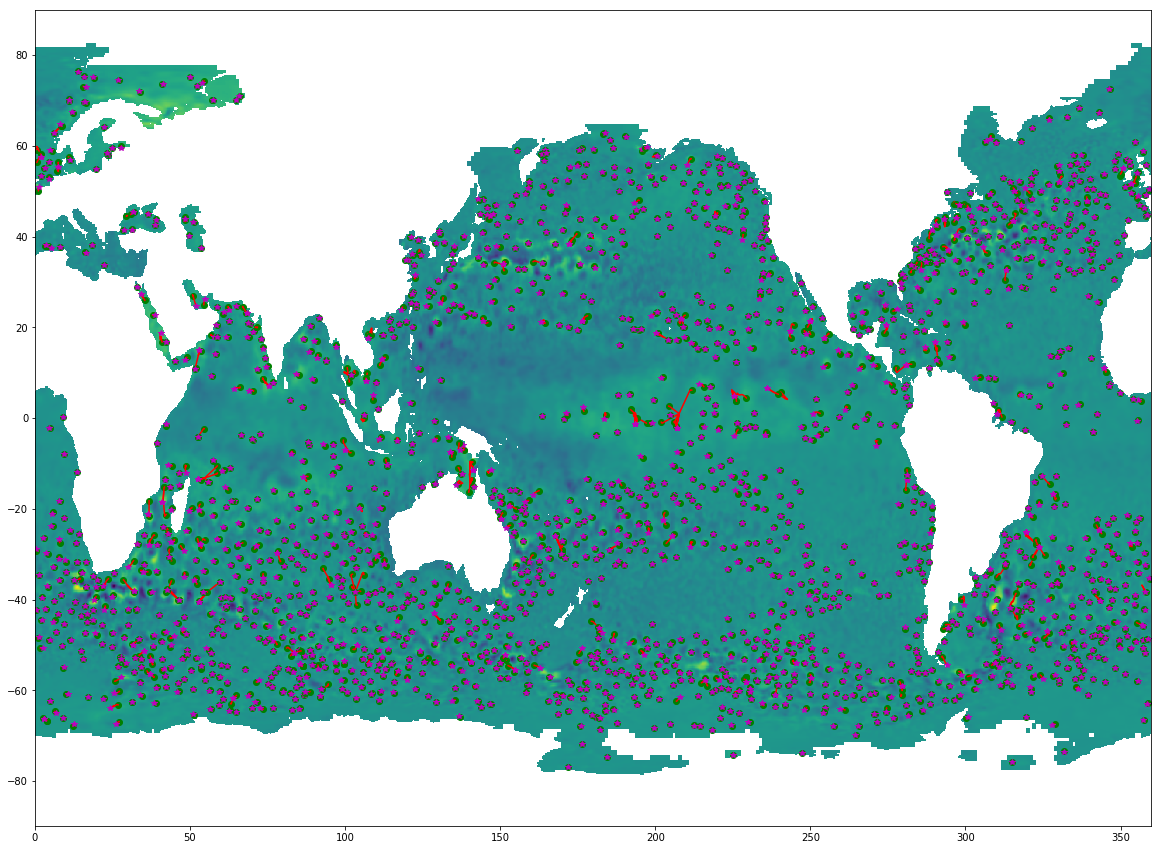

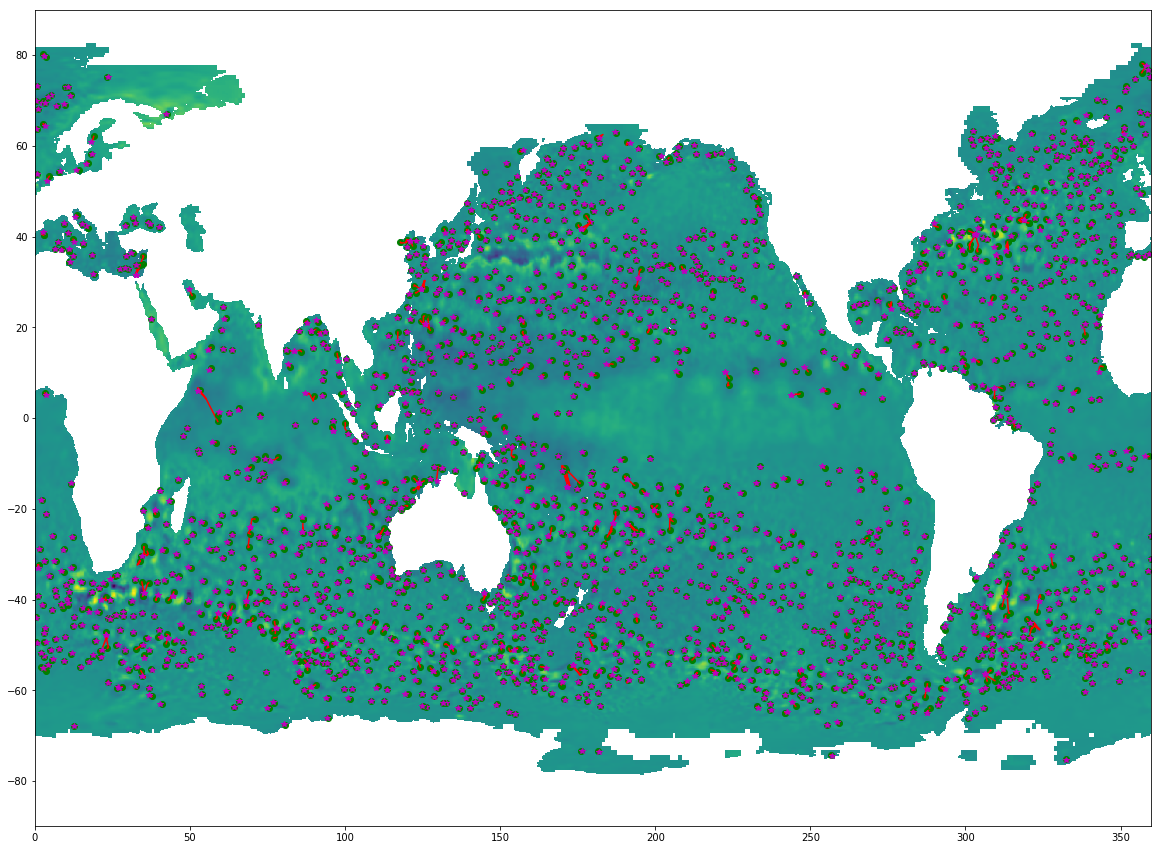

In [7]:
figure(figsize=(20,15))
pcolormesh(lon,lat,ssha[0,:,:])
for key,value in eddytd.items():
    #print(value['time'])
    
    if type(value['time'])!=int:
        #print(value['position'][:,0])
        plot(value['position_eddy'][1,0],value['position_eddy'][1,1],'og')
        plot(value['position_eddy'][1::,0],value['position_eddy'][1::,1],'-r')
        plot(value['position_eddy'][-1,0],value['position_eddy'][-1,1],'*m')
    #    for  ii in range(len(value['time'])):
figure(figsize=(20,15))
pcolormesh(lon,lat,ssha[0,:,:])
for key,value in eddytdn.items():
    #print(value['time'])
    
    if type(value['time'])!=int:
        #print(value['position'][:,0])
        plot(value['position_eddy'][1,0],value['position_eddy'][1,1],'og')
        plot(value['position_eddy'][1::,0],value['position_eddy'][1::,1],'-r')
        plot(value['position_eddy'][-1,0],value['position_eddy'][-1,1],'*m')
    #    for  ii in range(len(value['time'])):

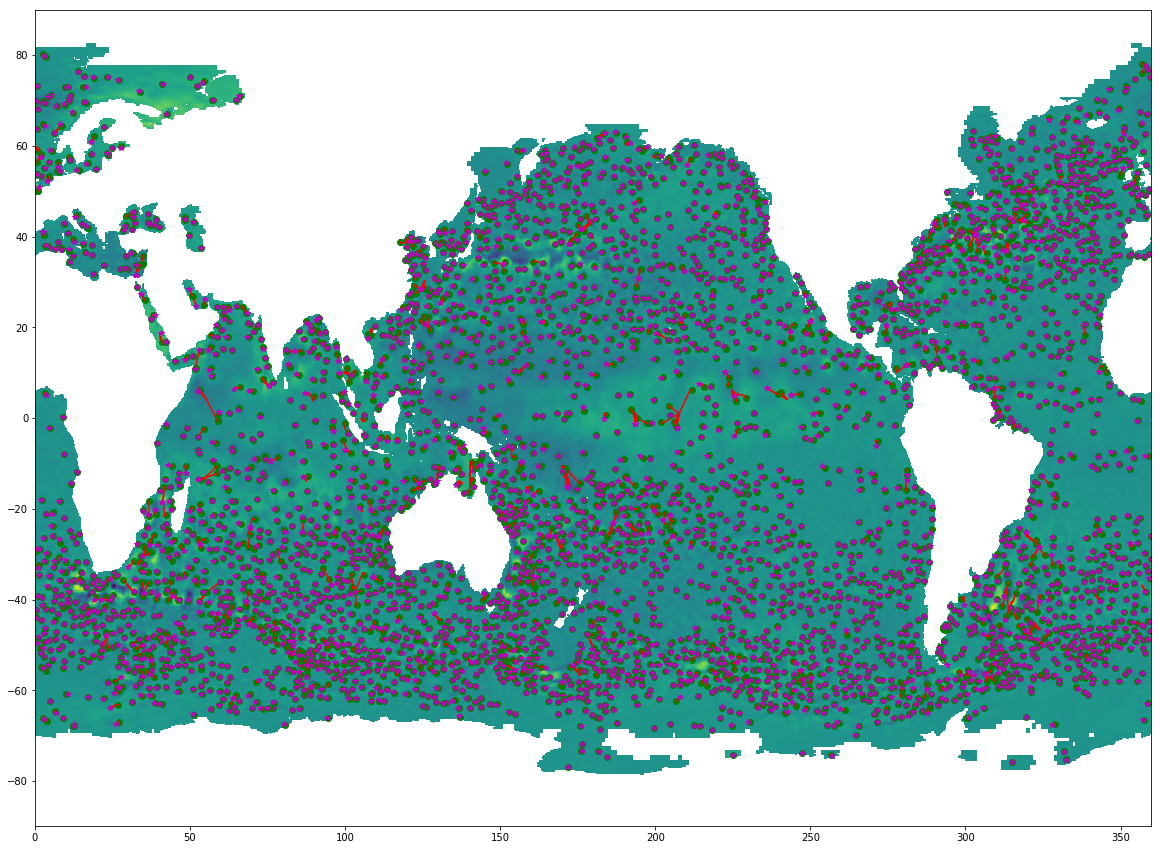

In [8]:
figure(figsize=(20,15))
pcolormesh(lon,lat,ssha[0,:,:])

for key,value in eddytd.items():
    if type(value['time'])!=int:
        #print(value['position'][:,0])
        plot(value['position_eddy'][1,0],value['position_eddy'][1,1],'og')
        plot(value['position_eddy'][1::,0],value['position_eddy'][1::,1],'-r')
        plot(value['position_eddy'][-1,0],value['position_eddy'][-1,1],'*m')
    #    for  ii in range(len(value['time'])):
for key,value in eddytdn.items():
    if type(value['time'])!=int:
        #print(value['position'][:,0])
        plot(value['position_eddy'][1,0],value['position_eddy'][1,1],'og')
        plot(value['position_eddy'][1::,0],value['position_eddy'][1::,1],'-r')
        plot(value['position_eddy'][-1,0],value['position_eddy'][-1,1],'*m')
    #    for  ii in range(len(value['time'])):

In [9]:
eddy=0
positions=zeros([2,len(eddytd.items()),90])
for key,value in eddytd.items():
    if type(value['time'])==int:
        #print(shape(value['position_eddy'][:]),shape(xpositions))
        positions[0,eddy,value['time']]=value['position'][0]
        positions[1,eddy,value['time']]=value['position'][1]
        
    else:
        realinx=0
        for ii in value['time']:
            #print(shape(squeeze(value['position_eddy'][realinx,0])))
            positions[0,eddy,ii]=squeeze(value['position'][realinx,0])
            positions[1,eddy,ii]=squeeze(value['position'][realinx,1])
            realinx=realinx+1
    eddy=eddy+1
    
positions[positions==0]=np.nan

    #if type(value['time'])!=int:
    #    xpositions=
    #    plot(value['position_eddy'][1,0],value['position_eddy'][1,1],'og')
    #    plot(value['position_eddy'][1::,0],value['position_eddy'][1::,1],'-r')
    #    plot(value['position_eddy'][-1,0],value['position_eddy'][-1,1],'*m')

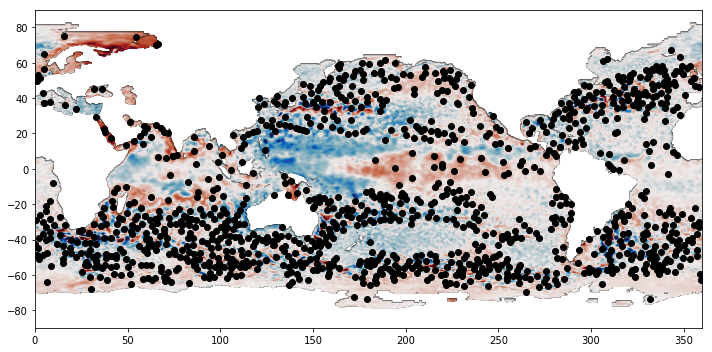

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

###########

fig = plt.figure(figsize=(10, 5),facecolor='white')
gs = gridspec.GridSpec(1, 1)

#############################

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)
quad1 = ax1.pcolormesh(lon,lat,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-40,vmax=40)
lines1, = plot(positions[0,:,0],positions[1,:,0],'ok')

def init():
    quad1.set_array([])
    lines1.set_data([],[])
    return quad1,quad2

def animate(iter):
    quad1.set_array(ssha[iter,:,:].ravel())
    lines1.set_data(positions[0,:,iter],positions[1,:,iter])
    return quad1,lines1

gs.tight_layout(fig)

anim2 = animation.FuncAnimation(fig,animate,frames=15,interval=1000,blit=False,repeat=False)
plt.show()

In [11]:
from matplotlib import animation, rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
anim2

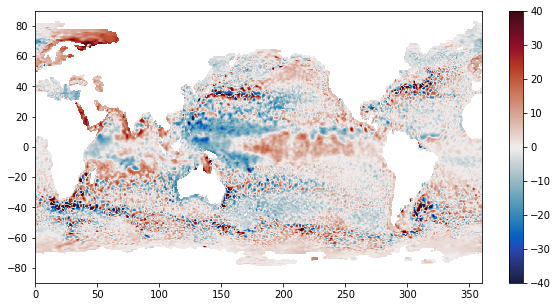

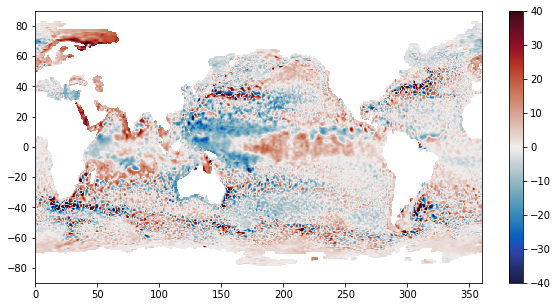

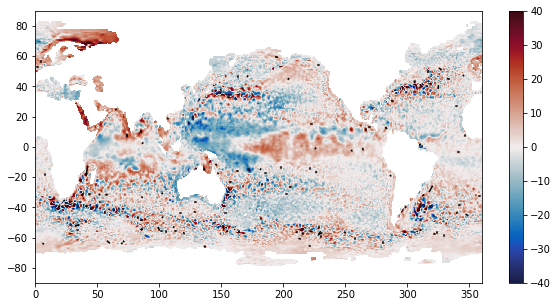

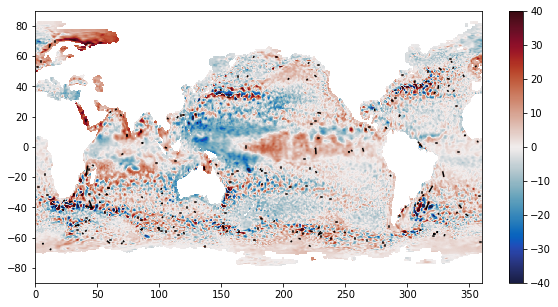

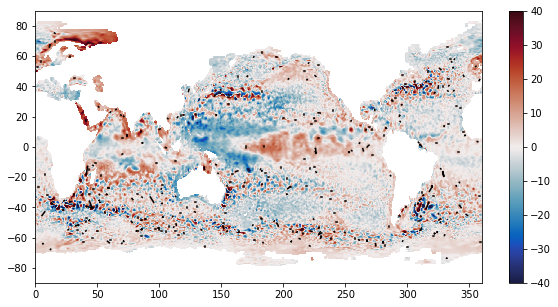

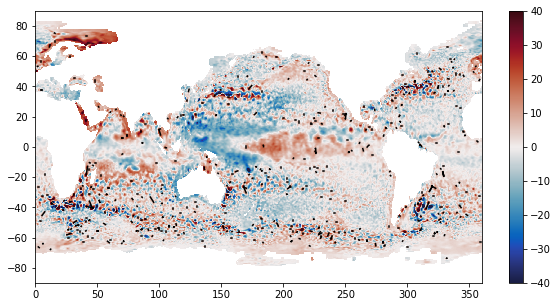

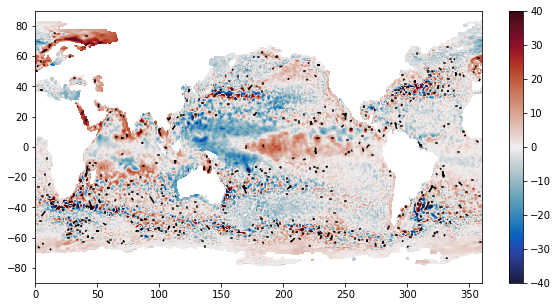

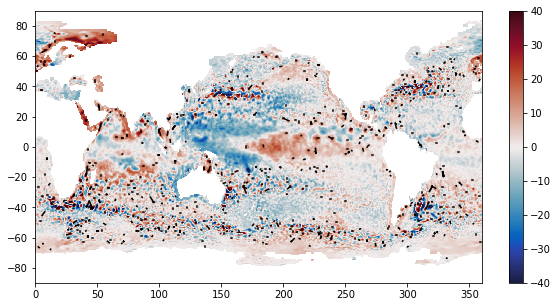

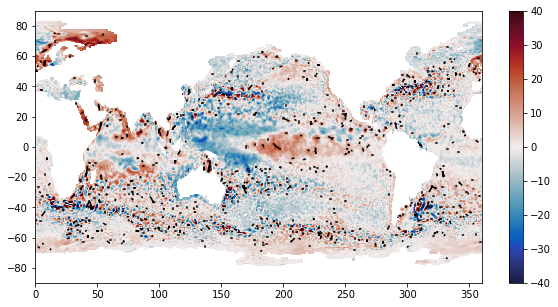

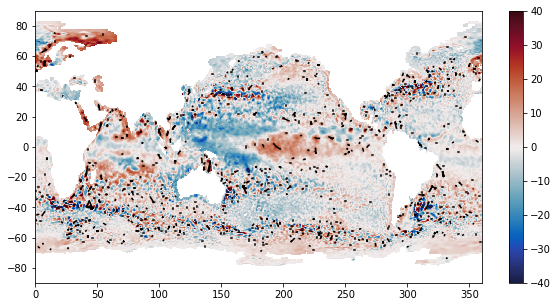

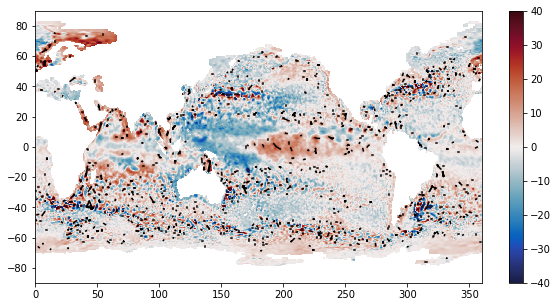

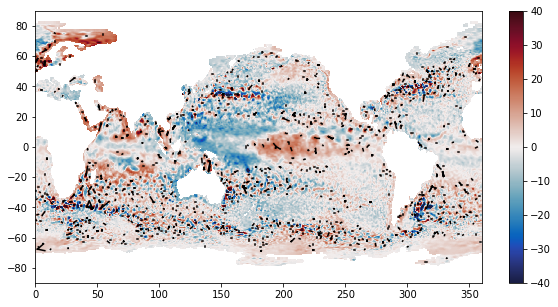

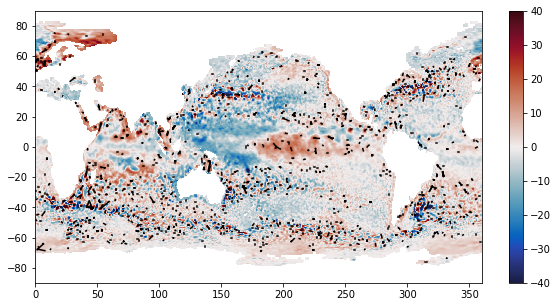

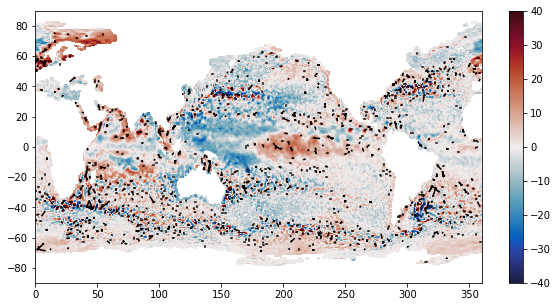

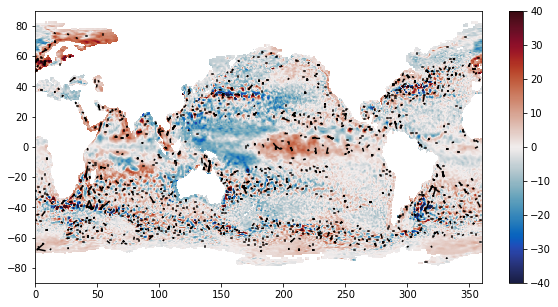

In [12]:
import cmocean as cm
X,Y=meshgrid(lon,lat)

for ii in range(0,15):
    figure(figsize=(10,5))
    #map = Basemap(projection='mbtfpq',lat_0=-90,lon_0=-180,resolution='c')
    #lonm,latm=map(X,Y)
    #map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
    #map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
    #map.fillcontinents(color='black',lake_color='aqua')
    #map.drawcoastlines()
    #map.drawcoastlines()
    #im=map.pcolormesh(lonm,latm,ssha[ii,:,:],cmap=cm.cm.balance,vmin=-40,vmax=40)
    pcolormesh(lon,lat,ssha[ii,:,:],cmap=cm.cm.balance,vmin=-40,vmax=40)
    colorbar()
    for jj in range(shape(positions[0,:,:])[0]):
        #coordsx,coordsy=map(positions[0,jj,0:ii],positions[1,jj,0:ii])
        #print
        #plot(positions[0,jj,0:ii],positions[1,jj,0],'og')
        plot(positions[0,jj,0:ii],positions[1,jj,0:ii],'-k')
    
    show()